In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation as R

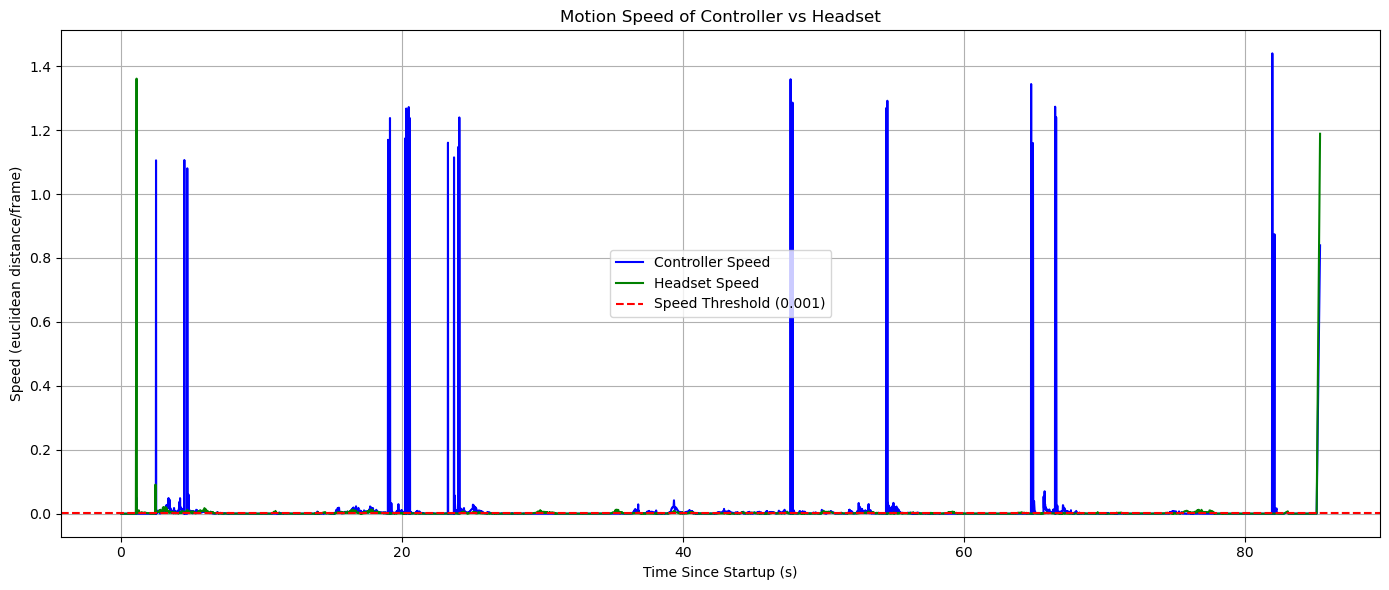

In [1]:
df = pd.read_csv("RightControllerData_20250721_142508.csv")

# --------- Controller Speed ----------
df["ctrl_dx"] = df["ControllerPosX"].diff()
df["ctrl_dy"] = df["ControllerPosY"].diff()
df["ctrl_dz"] = df["ControllerPosZ"].diff()
df["controller_speed"] = np.sqrt(df["ctrl_dx"]**2 + df["ctrl_dy"]**2 + df["ctrl_dz"]**2)

# --------- Headset Speed ----------
df["head_dx"] = df["HeadsetPosX"].diff()
df["head_dy"] = df["HeadsetPosY"].diff()
df["head_dz"] = df["HeadsetPosZ"].diff()
df["headset_speed"] = np.sqrt(df["head_dx"]**2 + df["head_dy"]**2 + df["head_dz"]**2)

# --------- Plot ----------
plt.figure(figsize=(14, 6))
plt.plot(df["TimeSinceStartup"], df["controller_speed"], label="Controller Speed", color='blue')
plt.plot(df["TimeSinceStartup"], df["headset_speed"], label="Headset Speed", color='green')
plt.axhline(0.001, color='red', linestyle='--', label='Speed Threshold (0.001)')
plt.xlabel("Time Since Startup (s)")
plt.ylabel("Speed (euclidean distance/frame)")
plt.title("Motion Speed of Controller vs Headset")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [2]:
df

,FrameNumber,TimeSinceStartup,HeadsetPosX,HeadsetPosY,HeadsetPosZ,HeadsetRotX,HeadsetRotY,HeadsetRotZ,HeadsetRotW,ControllerPosX,...,ControllerRotZ,ControllerRotW,ctrl_dx,ctrl_dy,ctrl_dz,controller_speed,head_dx,head_dy,head_dz,headset_speed
0,1,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,...,0.00000,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0.02000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,...,0.00000,1.00000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000
2,3,0.21946,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,...,0.00000,1.00000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000
3,4,0.25597,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,...,0.00000,1.00000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000
4,5,0.27579,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,...,0.00000,1.00000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5152,5153,85.02159,0.05183,1.17141,0.19687,0.11987,-0.22155,0.05455,0.96621,0.04651,...,-0.39022,0.91396,0.00015,-0.00059,-0.00098,0.001154,-0.00009,-0.00013,0.00009,0.000182
5153,5154,85.03557,0.05177,1.17128,0.19693,0.12021,-0.22190,0.05468,0.96608,0.04666,...,-0.39157,0.91328,0.00015,-0.00104,-0.00136,0.001719,-0.00006,-0.00013,0.00006,0.000155
5154,5155,85.08938,0.05187,1.17108,0.19677,0.12121,-0.22182,0.05490,0.96597,0.04681,...,-0.39300,0.91258,0.00015,-0.00097,-0.00127,0.001605,0.00010,-0.00020,-0.00016,0.000275
5155,5156,85.10899,0.05208,1.17111,0.19670,0.12119,-0.22156,0.05475,0.96604,0.04666,...,-0.39298,0.91249,-0.00015,-0.00017,-0.00009,0.000244,0.00021,0.00003,-0.00007,0.000223


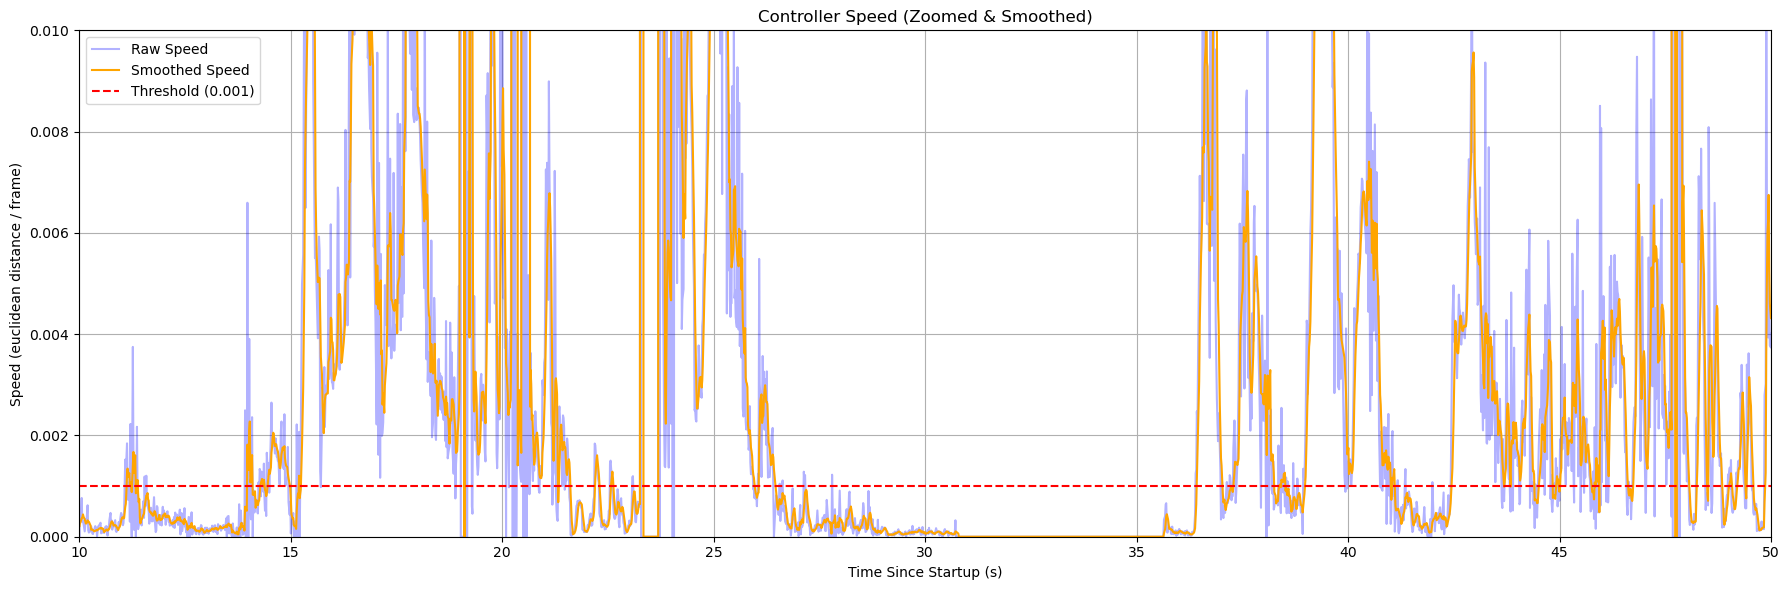

In [7]:
plt.figure(figsize=(18, 6))

plt.plot(df["TimeSinceStartup"], df["controller_speed"], label="Raw Speed", color='blue', alpha=0.3)

df["controller_speed_smooth"] = df["controller_speed"].rolling(window=5).mean()
plt.plot(df["TimeSinceStartup"], df["controller_speed_smooth"], label="Smoothed Speed", color='orange')

# Threshold
plt.axhline(0.001, color='red', linestyle='--', label='Threshold (0.001)')

plt.ylim(0, 0.01)
plt.xlim(10, 50)

plt.xlabel("Time Since Startup (s)")
plt.ylabel("Speed (euclidean distance / frame)")
plt.title("Controller Speed (Zoomed & Smoothed)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

****using time between 30-35 as a position for real drill


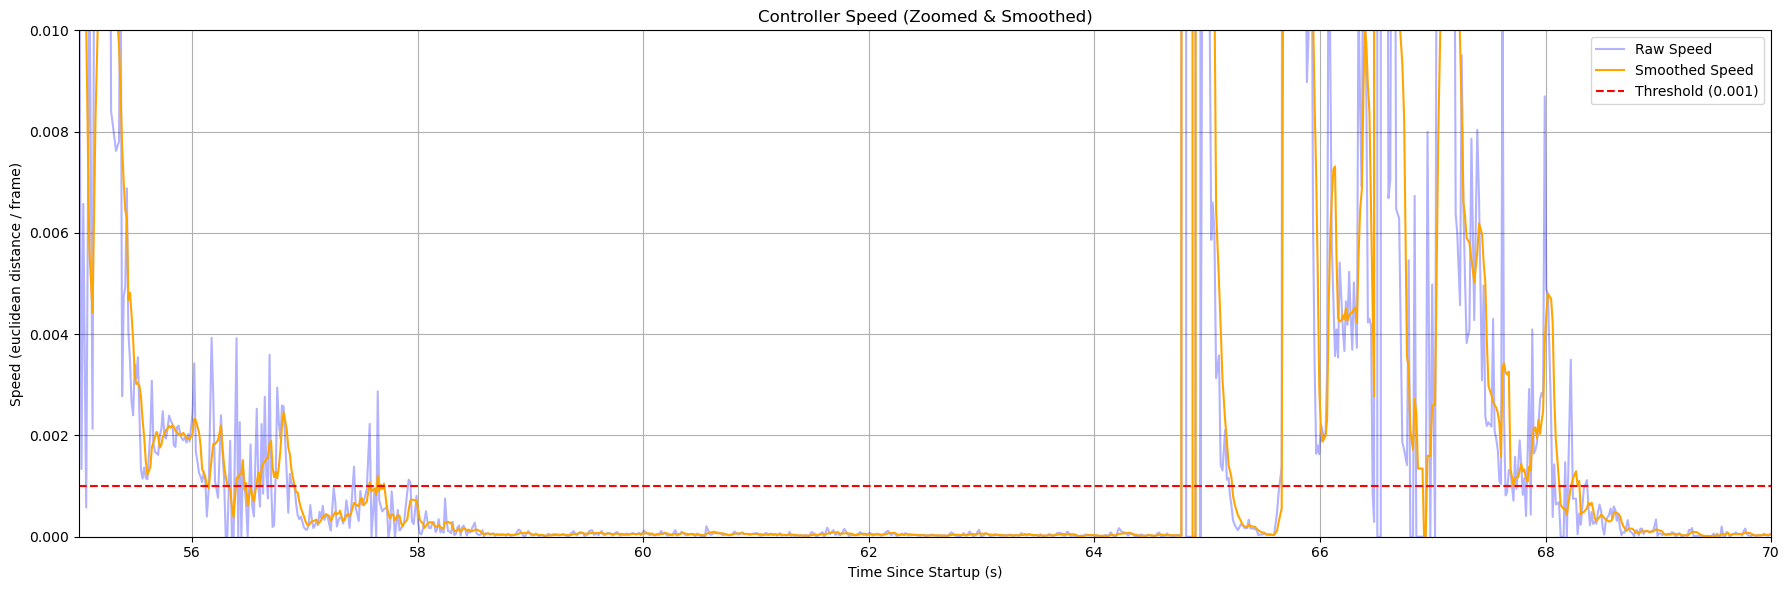

In [6]:
plt.figure(figsize=(18, 6))

plt.plot(df["TimeSinceStartup"], df["controller_speed"], label="Raw Speed", color='blue', alpha=0.3)

df["controller_speed_smooth"] = df["controller_speed"].rolling(window=5).mean()
plt.plot(df["TimeSinceStartup"], df["controller_speed_smooth"], label="Smoothed Speed", color='orange')

plt.axhline(0.001, color='red', linestyle='--', label='Threshold (0.001)')

plt.ylim(0, 0.01)
plt.xlim(55, 70)

plt.xlabel("Time Since Startup (s)")
plt.ylabel("Speed (euclidean distance / frame)")
plt.title("Controller Speed (Zoomed & Smoothed)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

***using time between 59-64 as a position for prototype

In [8]:
for cols in df:
    print(cols)

FrameNumber
TimeSinceStartup
HeadsetPosX
HeadsetPosY
HeadsetPosZ
HeadsetRotX
HeadsetRotY
HeadsetRotZ
HeadsetRotW
ControllerPosX
ControllerPosY
ControllerPosZ
ControllerRotX
ControllerRotY
ControllerRotZ
ControllerRotW
ctrl_dx
ctrl_dy
ctrl_dz
controller_speed
head_dx
head_dy
head_dz
headset_speed
controller_speed_smooth


In [10]:
df_real = df[(df['TimeSinceStartup'] >= 30) & (df['TimeSinceStartup'] <= 35)]

df_proto = df[(df['TimeSinceStartup'] >= 59) & (df['TimeSinceStartup'] <= 64)]

cols = [
    'ControllerPosX', 'ControllerPosY', 'ControllerPosZ',
    'ControllerRotX', 'ControllerRotY', 'ControllerRotZ', 'ControllerRotW'
]

real_mean = df_real[cols].mean()
proto_mean = df_proto[cols].mean()

print("== Real Drill Controller Mean ==")
print(real_mean)

print("\n== Prototype Controller Mean ==")
print(proto_mean)

offset = real_mean - proto_mean
print("\n== Estimated Offset (Real - Prototype) ==")
print(offset)

offset = proto_mean - real_mean
print("\n== Estimated Offset (Prototype - Real) ==")
print(offset)

== Real Drill Controller Mean ==
ControllerPosX    0.836632
ControllerPosY    0.760575
ControllerPosZ    0.025833
ControllerRotX   -0.332772
ControllerRotY   -0.347857
ControllerRotZ    0.116079
ControllerRotW   -0.868781
dtype: float64

== Prototype Controller Mean ==
ControllerPosX    0.896605
ControllerPosY    0.977869
ControllerPosZ   -0.041775
ControllerRotX    0.035355
ControllerRotY    0.023093
ControllerRotZ    0.650789
ControllerRotW   -0.758084
dtype: float64

== Estimated Offset (Real - Prototype) ==
ControllerPosX   -0.059973
ControllerPosY   -0.217294
ControllerPosZ    0.067608
ControllerRotX   -0.368127
ControllerRotY   -0.370951
ControllerRotZ   -0.534710
ControllerRotW   -0.110698
dtype: float64

== Estimated Offset (Prototype - Real) ==
ControllerPosX    0.059973
ControllerPosY    0.217294
ControllerPosZ   -0.067608
ControllerRotX    0.368127
ControllerRotY    0.370951
ControllerRotZ    0.534710
ControllerRotW    0.110698
dtype: float64


In [11]:
print("STD Real:", df_real[cols].std())
print("STD Proto:", df_proto[cols].std())

STD Real: ControllerPosX    0.000114
ControllerPosY    0.000046
ControllerPosZ    0.000152
ControllerRotX    0.000083
ControllerRotY    0.000201
ControllerRotZ    0.000059
ControllerRotW    0.000056
dtype: float64
STD Proto: ControllerPosX    0.000635
ControllerPosY    0.000484
ControllerPosZ    0.000355
ControllerRotX    0.000217
ControllerRotY    0.000376
ControllerRotZ    0.000116
ControllerRotW    0.000103
dtype: float64


In [10]:
df_real = df[(df['TimeSinceStartup'] >= 30) & (df['TimeSinceStartup'] <= 35)]

df_proto = df[(df['TimeSinceStartup'] >= 59) & (df['TimeSinceStartup'] <= 64)]

cols = [
    'ControllerPosX', 'ControllerPosY', 'ControllerPosZ',
    'ControllerRotX', 'ControllerRotY', 'ControllerRotZ', 'ControllerRotW'
]

real_mean = df_real[cols].mean()
proto_mean = df_proto[cols].mean()

print("== Real Drill Controller Mean ==")
print(real_mean)

print("\n== Prototype Controller Mean ==")
print(proto_mean)

offset = real_mean - proto_mean
print("\n== Estimated Offset (Real - Prototype) ==")
print(offset)

offset = proto_mean - real_mean
print("\n== Estimated Offset (Prototype - Real) ==")
print(offset)

== Real Drill Controller Mean ==
ControllerPosX    0.836632
ControllerPosY    0.760575
ControllerPosZ    0.025833
ControllerRotX   -0.332772
ControllerRotY   -0.347857
ControllerRotZ    0.116079
ControllerRotW   -0.868781
dtype: float64

== Prototype Controller Mean ==
ControllerPosX    0.896605
ControllerPosY    0.977869
ControllerPosZ   -0.041775
ControllerRotX    0.035355
ControllerRotY    0.023093
ControllerRotZ    0.650789
ControllerRotW   -0.758084
dtype: float64

== Estimated Offset (Real - Prototype) ==
ControllerPosX   -0.059973
ControllerPosY   -0.217294
ControllerPosZ    0.067608
ControllerRotX   -0.368127
ControllerRotY   -0.370951
ControllerRotZ   -0.534710
ControllerRotW   -0.110698
dtype: float64

== Estimated Offset (Prototype - Real) ==
ControllerPosX    0.059973
ControllerPosY    0.217294
ControllerPosZ   -0.067608
ControllerRotX    0.368127
ControllerRotY    0.370951
ControllerRotZ    0.534710
ControllerRotW    0.110698
dtype: float64


In [12]:
df['RelX'] = df['ControllerPosX'] - df['HeadsetPosX']
df['RelY'] = df['ControllerPosY'] - df['HeadsetPosY']
df['RelZ'] = df['ControllerPosZ'] - df['HeadsetPosZ']

df_real = df[(df['TimeSinceStartup'] >= 30) & (df['TimeSinceStartup'] <= 35)]

df_proto = df[(df['TimeSinceStartup'] >= 59) & (df['TimeSinceStartup'] <= 64)]

cols_rel = ['RelX', 'RelY', 'RelZ']

real_mean = df_real[cols_rel].mean()
proto_mean = df_proto[cols_rel].mean()

print("== Headset-relative Mean Position ==")
print("\nReal Drill:")
print(real_mean)
print("\nPrototype:")
print(proto_mean)

offset = real_mean - proto_mean
print("\n== Estimated Mounting Offset (Real - Prototype) ==")
print(offset)

offset2 = proto_mean - real_mean
print("\n== Estimated Mounting Offset (Prototype - Real) ==")
print(offset2)

== Headset-relative Mean Position ==

Real Drill:
RelX    0.410475
RelY   -0.421204
RelZ    0.377967
dtype: float64

Prototype:
RelX    0.368995
RelY   -0.248696
RelZ    0.418108
dtype: float64

== Estimated Mounting Offset (Real - Prototype) ==
RelX    0.041480
RelY   -0.172508
RelZ   -0.040142
dtype: float64

== Estimated Mounting Offset (Prototype - Real) ==
RelX   -0.041480
RelY    0.172508
RelZ    0.040142
dtype: float64


In [13]:
df['RelX'] = df['ControllerPosX'] - df['HeadsetPosX']
df['RelY'] = df['ControllerPosY'] - df['HeadsetPosY']
df['RelZ'] = df['ControllerPosZ'] - df['HeadsetPosZ']

df_real = df[(df['TimeSinceStartup'] >= 30) & (df['TimeSinceStartup'] <= 35)]
df_proto = df[(df['TimeSinceStartup'] >= 59) & (df['TimeSinceStartup'] <= 64)]

cols_pos = ['RelX', 'RelY', 'RelZ']
real_mean = df_real[cols_pos].mean()
proto_mean = df_proto[cols_pos].mean()
offset_xyz = real_mean - proto_mean

print("== XYZ Offset ==")
print(offset_xyz)

real_quat = df_real[['ControllerRotX', 'ControllerRotY', 'ControllerRotZ', 'ControllerRotW']].mean().values
proto_quat = df_proto[['ControllerRotX', 'ControllerRotY', 'ControllerRotZ', 'ControllerRotW']].mean().values

r_real = R.from_quat(real_quat)
r_proto = R.from_quat(proto_quat)

r_offset = r_real * r_proto.inv()

quat_offset = r_offset.as_quat()
print("\n== Quaternion Rotation Offset (Real - Proto) ==")
print(f"[X, Y, Z, W] = {quat_offset}")


== XYZ Offset ==
RelX    0.041480
RelY   -0.172508
RelZ   -0.040142
dtype: float64

== Quaternion Rotation Offset (Real - Proto) ==
[X, Y, Z, W] = [0.51204748 0.06309979 0.47278224 0.71435478]


In [14]:
df_real = df[(df['TimeSinceStartup'] >= 30) & (df['TimeSinceStartup'] <= 35)].copy()
df_proto = df[(df['TimeSinceStartup'] >= 59) & (df['TimeSinceStartup'] <= 64)].copy()

def get_relative_quat(ctrl_row, head_row):
    r_ctrl = R.from_quat(ctrl_row)
    r_head = R.from_quat(head_row)
    return r_head.inv() * r_ctrl

rel_quats_real = []
rel_quats_proto = []

for i in range(len(df_real)):
    ctrl_q = df_real.iloc[i][['ControllerRotX', 'ControllerRotY', 'ControllerRotZ', 'ControllerRotW']].values
    head_q = df_real.iloc[i][['HeadsetRotX', 'HeadsetRotY', 'HeadsetRotZ', 'HeadsetRotW']].values
    rel_quats_real.append(get_relative_quat(ctrl_q, head_q).as_quat())

for i in range(len(df_proto)):
    ctrl_q = df_proto.iloc[i][['ControllerRotX', 'ControllerRotY', 'ControllerRotZ', 'ControllerRotW']].values
    head_q = df_proto.iloc[i][['HeadsetRotX', 'HeadsetRotY', 'HeadsetRotZ', 'HeadsetRotW']].values
    rel_quats_proto.append(get_relative_quat(ctrl_q, head_q).as_quat())

rel_real_mean = np.mean(rel_quats_real, axis=0)
rel_proto_mean = np.mean(rel_quats_proto, axis=0)

r_real_rel = R.from_quat(rel_real_mean)
r_proto_rel = R.from_quat(rel_proto_mean)
r_offset = r_real_rel * r_proto_rel.inv()

quat_offset_headset_relative = r_offset.as_quat()

print("== Rotation Offset (Headset-relative) ==")
print(f"[X, Y, Z, W] = {quat_offset_headset_relative}")

== Rotation Offset (Headset-relative) ==
[X, Y, Z, W] = [-0.08587309  0.20400344  0.67655363  0.70234151]
